# 5.1 Regression introduction

회귀란 제 자리로 돌아오는 것을 말한다. <br>
값이 퍼지지 않고 일정한 형태 안으로 들어오는 것을 말한다고 볼 수 있다.<br>
머신러닝 회귀 예측에서 중요한 것은 학습을 통해 **최적의 회귀 계수**를 찾아내는 것이다.<br>

회귀는 보통 $Y = W_1 * X_1 + W_2 * X_2 + ... + W_n * X_n$ 과 같은 모양을 이야기 한다. 여기서 종속변수는 Y, 독립변수는 X를 가리킨다. <br>
그리고 독립변수 개수에 따라 회귀 유형이 달라진다. 독립변수가 하나면 단일회귀, 둘 이상이면 다중회귀라 한다. <br>
만약 회귀 계수의 결합 형태가 선형이라면 선형회귀, 비선형이라면 비선형 회귀이다.<br><br>
대표적인 선형회귀 모델은 아래와 같다. <br>
1. **일반선형회귀** : RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화한다. Regulation을 적용하지 않은 모델 <br>
2. **Ridge** : L2 Regulation을 적용. 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 **회귀 계수값을 더 작게 만듦.** <br>
3. **Lasso** : L1 Regulation을 적용. **예측 영향력이 작은 피처의 회귀 계수를 0으로 만듦.** <br>
4. **Elasticnet** : **L2와 L1을 둘다 적용.** 보통 피처가 많은 데이터 세트에서 사용. <br>
5. **Logistic Regression** : 분류에 사용되는 선형모델. 희소 영역의 분류(텍스트) 같은 영역에서 뛰어난 예측 성능을 보임. <br><br><br><br><br>

# 5.2 RSS

**RSS**란 무엇일까? <br>
RSS는 각 피처마다 실제값에서 예측값을 빼고 제곱한 뒤에 모두 더한 값을 이야기 한다. 그래서 RSS값이 최소가 될 수록 모델의 예측력이 더 정확해 지는 것이다. 공식을 살펴보자. <br><br>
<center>$RSS(w_0, w_1) = \frac{1}{N} \Sigma^{N}_{i=1} {(y-(w_0 + w_1 * x_i))}^2$ </center><br><br>
이 함수를 '비용함수'라고도 하고, 최소의 오류 값을 찾는 것이기에 'loss function(손실함수)'라고도 한다.<br><br><br>

# 5.3 Gradient Descent

Gradient Descent는 경사하강법이라고 부른다. 경사 하강법은 RSS가 최소가 될 수 있도록 $W$ 파라미터를 계속 보정해 나간다. 경사를 타고 쭉 하강하면서 내려오듯 파라미터가 오류를 가장 최소화 하는 곳까지 도달하면 그 때 경사하강법을 멈추는 것이다. <br>
![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99E6363359D86A8805) <br>
2차함수를 미분하여 1차 함수의 기울기가 최소인 지점까지 경사를 타고 내려간다. <br>
RSS는 두개의 파라미터 $w_0$와 $w_1$을 가지고 있기 때문에 편미분을 사용해야 한다. <br>
R(w) = RSS를 편미분 한 결과는 아래와 같다. <br><br>
<center>$\frac{\partial R(w)}{\partial w_1} = \frac{2}{N}\Sigma^{N}_{i=1}-x_t * (y_i - ( w_0 + w_1 x_i ) = -\frac{2}{N}\Sigma^{N}_{i=1} x_i * (실제값 - 예측값)$</center> </br> <br>
<center>$\frac{\partial R(w)}{\partial w_0} = \frac{2}{N}\Sigma^{N}_{i=1} -(y_i - ( w_0 + w_1 x_i ) = -\frac{2}{N}\Sigma^{N}_{i=1} (실제값 - 예측값)$</center> </br> <br>
* 그런데 여기서 편미분 값이 너무 클 수 있기 때문에 보정개수 $\eta$를 곱하는데 이를 학습률(learning rate)라고 한다. </br> <br>
learning rate를 곱한 값 $w_1 - \eta \frac{2}{N} \Sigma x_i * (실제값 - 예측값)$, $w_0 - \eta \frac{2}{N} \Sigma(실제값 - 예측값)$을 반복적으로 적용하면서 계산한다. </br> <br>
파이썬 코드를 통해서 Gradient Descent를 간단히 구현해보도록 하겠다.

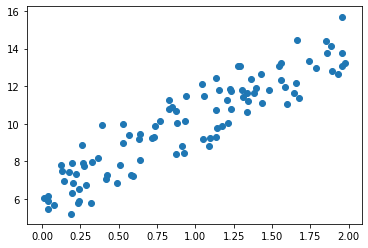

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

우리는 get_weight_update()함수를 알아볼 것인데 이 함수는 $w_0$과 $w_1$을 업데이트해준다. 밑에 코드에서 y_pred는 여러개의 X데이터와 w1을 곱해야 하므로 transpose를 사용한다.

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [6]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print("Gradient Descent Total cost:{0:.4f}".format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total cost:0.9935


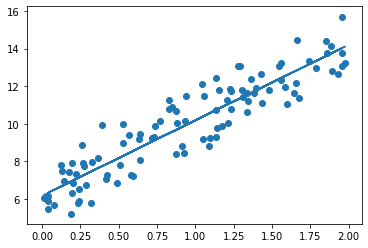

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### Stochastic Gradient Descent

일반 gradient descent는 전체 데이터에 대해 반복적으로 업데이트 하기 때문에 시간이 매우 오래걸린다는 단점이 있다. <br>
그래서 일부 데이터만 사용하는 Stochastic Gradient Descent를 사용하여 일부 데이터만 이용한다. <br>
미니 배치, 확률적 경사 하강법이라고도 한다. <br>

In [15]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [16]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print("Gradient Descent Total cost:{0:.4f}".format(get_cost(y, y_pred)))

w1:4.028 w0:6.156
Gradient Descent Total cost:0.9937


* 다항회귀 같은 경우는 $y = w_0 + w_1 * X_1 + w_2 * X_2 + ... + w_n * X_n$과 같이 표현 할 수 있다.

![]() <br>